<center> <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Booking.com_Logo.svg/220px-Booking.com_Logo.svg.png alt="drawing" style="width:400px;">

# <center> Проект: Обучение модели для сайта Booking

* Представьте, что вы работаете дата-сайентистом в компании Booking. 
* Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. 
* Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.
* Вам поставлена задача создать такую модель на основе датасета

## Оглавление  
[1. Ответы на вопросы, связанные с первичными данными](#one)  
[2. Ответы на вопросы по обработанным данным](#two)  
[3. Создание и преобразование признаков](#three)  
[4. Очистка от пропущенных значений](#four)  
[5. Проверка на выбросы](#five)  
[6. Проверка на нормальность, нормализация и стандартизация](#six)  
[7. Удаление ненужных текстовых данных](#seven)  
[8. Отбор признаков](#eight)  
[9. Оценка влияния признаков](#nine)  
[10. Моделирование](#ten)  

Первоначальная версия датасета содержит 17 полей со следующей информацией:

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

In [1]:
import pandas as pd

In [2]:
!pip freeze > requirements.txt

In [3]:
hotels = pd.read_csv('data/hotels.zip')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


# 1. Ответы на вопросы, связанные с первичными данными <a name="one"></a>

In [4]:
#Отвечаем на некоторые вопросы, связанные с данными
hotels.info()

# пропущенные данные есть в столбцах lat и lng
# их можно также посмотреть через
# cols_null_percent = hotels.isnull().mean() * 100
# cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
# display(cols_with_null)


# данные числового формата хранятся в столбцах: 
# additional_number_of_scoring
# average_score
# review_total_negative_word_counts
# total_number_of_reviews 
# review_total_positive_word_counts
# total_number_of_reviews_reviewer_has_given
# reviewer_score
# lat
# lng

# данные строкового формата хранятся в столбцах: 
# hotel_address
# hotel_name
# reviewer_nationality
# negative_review
# positive_review
# tags
# days_since_review 


# признак, представляющий собой дату - review_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

:arrow_up:[к оглавлению](#Оглавление)

# 2. Ответы на вопросы по обработанным данным <a name="two"></a>

In [5]:
#попробуем создать максимальное количество признаков, но для начала ответим на вопросы

#переведем столбец review date в тип даты
hotels_prepared = hotels.copy()
hotels_prepared['review_date'] = pd.to_datetime(hotels_prepared['review_date'])

#ответы на вопросы по данным

#даты самого первого и свежего отзыва
#hotels_prepared['review_date'].min()
#2017-08-03
#hotels_prepared['review_date'].max()
#2015-08-04

# количество уникальных названий отелей
# len(hotels_prepared['hotel_name'].unique())
# 1492


#переведём столбец days_since_review в числовой формат
hotels_prepared['days_since_review'] = hotels_prepared['days_since_review'].apply(lambda x: x.split(" ")[0]).astype('int')


In [6]:
#определение количества уникальных тегов
list_of_tags=list()

#преобразуем строковые значения в список, убираем ненужные символы, добавляем уникальные значения в список
for i in range(0,hotels_prepared.shape[0]):
    unique_values = list(hotels_prepared['tags'][i].replace("[",'').replace(']','').split(', '))
    for j in unique_values:
        if j not in list_of_tags: list_of_tags.append(j)
        
display(len(list_of_tags))
# 2368

2368

In [7]:
# определим какой тег встречается чаще всего
# cделаем отдельную копию df c одним столбцоv tags
hotels_prepared_new = hotels_prepared.copy()
new_list = list(hotels_prepared_new.columns)
new_list.remove('tags')
hotels_prepared_new = hotels_prepared_new.drop(new_list, axis = 1)  

#разделим значения в столбце, уберем ненужные символы и переведём в вид списка
hotels_prepared_new['tags'] = hotels_prepared_new['tags'].apply(lambda x: list(x.replace("[",'').replace(']','').split(', ')))

#используем explode чтобы вывести значения списка с каждую отдельную строку
hotels_prepared_new = hotels_prepared_new.explode('tags')

#посчитаем значения встречающихся тегов, отсортируем по количеству и выведем первое
hotels_prepared_new['tags'].value_counts(ascending=False).head(1)
#' Leisure trip '  313593

' Leisure trip '    313593
Name: tags, dtype: int64

In [8]:
# сколько ночей останавливаются путешественники
# заметил, что теги с указанием количества ночей начинаются с слов Stayed
# соберем список таких тегов
list_of_tags_nights = []
for i in list_of_tags:
    if 'Stayed' in i and (i not in list_of_tags_nights):
        list_of_tags_nights.append(i)
        
# len(list_of_tags_nights)
# получилось около 30 вариантов

#display(hotels_prepared_new.value_counts(ascending=False).loc[list_of_tags_nights,].sort_values(ascending=False))
# самый популярный  - на 1 ночь

:arrow_up:[к оглавлению](#Оглавление)

# 3. Создание и преобразование признаков <a name="three"></a>
Предлагаю создать следующие признаки:
*   Месяц из даты отзыва
*   Год из даты отзыва (будет категориальным)
*   Признак reviewer_nationality преобразуем в категориальный
*   Страна отеля (будет категориальным)
*   Количество проведённых ночей по тегах
*   Количество тегов
*   Наличие соответствующего тега (выберем наиболее популярные, остальные - заменим значением)
*   Дополнительные признаки, которые можно вытащить из тегов (возможно их можно как-то разделить на группы)
*   Сумма длины позитивного и негативного отзыва
*   Разница между длиной позитивного и негативного отзыва 
*   Соотношение длины позитивного и негативного отзыва
*   Признаки по эмоциональной окраске текста (библиотека nltk)

In [9]:
# выделяем признак месяца
hotels_prepared['month_of_review'] = hotels_prepared['review_date'].dt.month
#hotels_prepared['month_of_review'].head()

In [10]:
# выделяем признак года (отказался от признака)
hotels_prepared['year_of_review'] = hotels_prepared['review_date'].dt.year
#hotels_prepared['year_of_review'].head()

In [11]:
#Признак reviewer_nationality преобразуем в категориальный
#всего 225 уникальных значений
len(hotels_prepared['reviewer_nationality'].unique())

225

In [12]:
import category_encoders as ce

In [13]:
#закодируем признак национальности

# используем двоичное кодирование
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_prepared['reviewer_nationality'])
hotels_prepared = pd.concat([hotels_prepared, type_bin], axis=1)

#hotels_prepared.head(5)

In [14]:
# кодируем признак страна отеля

# для начала вычленим название страны - это последние два символа
hotels_prepared['hotel_address_prep'] = hotels_prepared['hotel_address'].apply(lambda x: x.split(" ")[-2:]).astype('str')
#hotels_prepared['hotel_address_prep'].value_counts(ascending=False, normalize=True)
#уникальных стран всего 6

#оne hot
bin_encoder = ce.OneHotEncoder(cols=['hotel_address_prep'], use_cat_names=True) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_prepared['hotel_address_prep'])
hotels_prepared = pd.concat([hotels_prepared, type_bin], axis=1)

In [15]:
#Количество проведённых ночей по тегах
#Нужна цифра стоит между 'Stayed' и 'night' 
# используем регулярные выражения
hotels_prepared['nights'] = hotels['tags'].str.findall('(?<=Stayed\s)\d{1,2}')

#переводим в строковый формат
hotels_prepared['nights'] = hotels_prepared['nights'].astype('str')

#есть случаи, когда нужных тегов не было, тогда заменяем значение
hotels_prepared['nights'] = hotels_prepared['nights'].apply(lambda x: "'0'" if x=='[]' else x)

#вытаскиваем цифры из списка и переводим в числовой формат
hotels_prepared['nights'] = hotels_prepared['nights'].apply(lambda x: x.split("'")[1])
hotels_prepared['nights'] = hotels_prepared['nights'].astype('int')

In [16]:
# выведем признак количества тегов
hotels_prepared['count_tags']=hotels_prepared['tags'].apply(lambda x: len(x.split(',')))
#их максимум 6
#hotels_prepared['count_tags'].value_counts()

In [17]:
#пробуем сгруппировать теги по определённым категориям. начнём с топ-100
popular_tags = list(hotels_prepared_new['tags'].value_counts().nlargest(100).index)
#display(popular_tags)

#сначала удалим все теги с указанием количества ночей
for i in popular_tags:
    if ('Stayed' in i):
        popular_tags.remove(i)
popular_tags.remove("' Stayed 2 nights '") #не удалялось перебором, поэтому убрал вручную 
    
#вижу есть уровни номеров - Standard, Classic, Superior, Deluxe. Попробуем собрать их
class_type = ['Standard', 'Comfort','Classic','Superior', 'Deluxe','Executive','Premier']
class_room_tags = []
for i in popular_tags:
    for j in class_type:
        if j in i:
            class_room_tags.append(i)
            
#display(len(class_room_tags)) #44 из 100 самых популярных тегов

for i in class_room_tags:
    popular_tags.remove(i)
    

#вижу есть типы путешественников - Solo, Couple, Group, Family. Попробуем собрать их
traveller_type = ['Solo', 'Couple','Family', 'Group']
traveller_type_tags = []
for i in popular_tags:
    for j in traveller_type:
        if j in i:
            traveller_type_tags.append(i)
            
#display(len(traveller_type_tags)) #8 из 100 самых популярных тегов

for i in traveller_type_tags:
    popular_tags.remove(i)

#создадим дополнительные признаки по категории номера и типам путешественников

for i in class_type:
    hotels_prepared[i] = hotels_prepared['tags'].apply(lambda x: 1 if i in x else 0)
    
for i in traveller_type:
    hotels_prepared[i] = hotels_prepared['tags'].apply(lambda x: 1 if i in x else 0)  

In [18]:
#Кодирование признака на наличие соответствующего тега (выберем наиболее 20 популярных, остальные - заменим значением) 

hotels_prepared_new['tags'].value_counts(ascending=False).head(20)
#20 наиболее популярных тегов будут встречаться в почти 96% значений
popular_20tags = list(hotels_prepared_new['tags'].value_counts().nlargest(20).index)

#убираем списка теги с указанием количества ночей - у нас уже есть признак, который отвечает за это (nights)
for i in popular_20tags:
    if ('Stayed' in i):
        popular_20tags.remove(i)

popular_20tags.remove("' Stayed 2 nights '") #не удалялось перебором, поэтому убрал вручную

#почистим от тегов, которые включались выше
for i in class_room_tags:
    if i in popular_20tags:
        popular_20tags.remove(i)
    
for i in traveller_type_tags:
    if i in popular_20tags:
        popular_20tags.remove(i)

#может быть такая ситуация, что у одного отзыва может быть несколько разных тегов, поэтому для каждого тега сделаем отдельный сигнальный столбец

for i in popular_20tags:
    hotels_prepared[i] = hotels_prepared['tags'].apply(lambda x: 1 if i in x else 0)

In [19]:
#Разница в количестве слов между хорошим и плохим отзывов
hotels_prepared['diff_positive_negative_words_count'] = hotels_prepared['review_total_positive_word_counts'] - hotels_prepared['review_total_negative_word_counts']

#Доля количества слов позитивного отзыва в общей сумме слов позитивного и негативного отзыва
hotels_prepared['proportion_positive_words_count'] = hotels_prepared['review_total_positive_word_counts']/(hotels_prepared['review_total_positive_word_counts'] + hotels_prepared['review_total_negative_word_counts'])

#чтобы исключить деление на 0 и возникновение пустого значения, заменим пропуски нулями
values = {
    'proportion_positive_words_count': 0
}
hotels_prepared = hotels_prepared.fillna(values)

#сумма длин слов положительного и отрицательного отзыва
hotels_prepared['sum_words_count'] = hotels_prepared['review_total_positive_word_counts'] + hotels_prepared['review_total_negative_word_counts']

In [20]:
#признаки эмоциональной окраски текста
#импортируем библиотеки
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

#может быть несколько вариантов комбинаций

#доля негативных слов в позитивном отзыве
#доля нейтральных слов в позитивном отзыве
#доля доля позитивных слов в позитивном отзыве
#оценка compound в позитивном отзыве

#доля негативных слов в негативном отзыве
#доля нейтральных слов в негативном отзыве
#доля доля позитивных слов в негативном отзыве
#оценка compound в негативном отзыве

#сначала просто создаем основные столбцы
hotels_prepared['positive_review_dict'] = hotels_prepared['positive_review'].apply(sent_analyzer.polarity_scores)
hotels_prepared['negative_review_dict'] = hotels_prepared['negative_review'].apply(sent_analyzer.polarity_scores)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
#теперь выделяем значения из столбоцов со словарями
#и создаем столбцы
#их будет 8 штук, поэтому лучше написать функцию
def shares_in_review(column):
    list_of_shares = ['neg', 'neu','pos','compound']
    for i in list_of_shares:
        hotels_prepared['{}_in_{}'.format(i,column)] = hotels_prepared['{}_dict'.format(column)].apply(lambda x: x[i])

shares_in_review('positive_review')
shares_in_review('negative_review')

In [22]:
#удаляем два столбца со словарями
hotels_prepared = hotels_prepared.drop(['negative_review_dict','positive_review_dict'], axis=1)

In [23]:
len(hotels_prepared.columns)

63

## Вывод:
После преобразования количество столбцов с данными увеличилось с 17 до 63. Попробуем поработать с ними на следующих этапах.

:arrow_up:[к оглавлению](#Оглавление)

# 4. Очистка от пропущенных значений <a name="four"></a>

lat    0.0
lng    0.0
dtype: float64

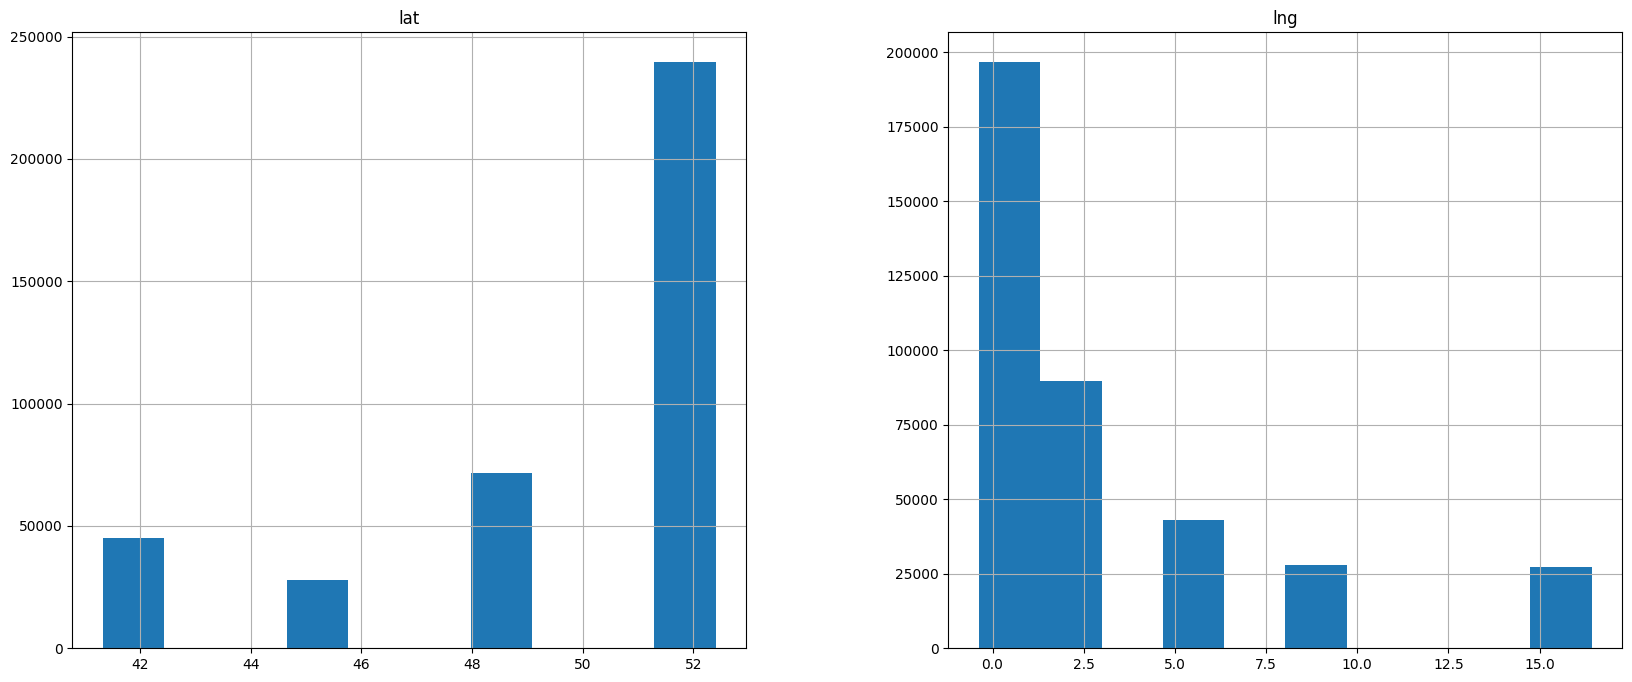

In [24]:
# работа с пропусками
# пропуски есть в двух столбцах - lat и lng (широта и долгота отеля). 
# посмотрим как распределены значения в этих столбцах
list_of_columns_to_fill = ['lat','lng']
hotels_prepared[list_of_columns_to_fill].hist(figsize=(20, 8));

#графически они отличны от нормального, поэтому теоретически можно заполнить их модой. к тому же доля пропусков менее 1%
#но, т.к. количество стран всего 6, можно заполнить их средними значениям тех отелей, которые находятся в той же стране.

#ищем средние координаты по стране
mean_coordinates = hotels_prepared.groupby(['hotel_address_prep'])[['lat','lng']].mean()

#создаем два столбца со средними координатами
hotels_prepared['lat_mean'] = hotels_prepared['hotel_address_prep'].apply(lambda x: mean_coordinates.loc[x,'lat'])
hotels_prepared['lng_mean'] = hotels_prepared['hotel_address_prep'].apply(lambda x: mean_coordinates.loc[x,'lng'])

#заполняем пропуски средним значением
values = {
    'lat': hotels_prepared['lat_mean'],
    'lng': hotels_prepared['lng_mean']
}

hotels_prepared = hotels_prepared.fillna(values)

#убираем два столбца со средним значением
hotels_prepared = hotels_prepared.drop(['lng_mean', 'lat_mean'], axis=1)

#проверка на наличие пустых значений
hotels_prepared[list_of_columns_to_fill].isnull().mean()

## Вывод:
Пропуски были только в признаках координат. Заменили их средним значением по соответствующей стране

:arrow_up:[к оглавлению](#Оглавление)

# 5. Проверка на выбросы <a class="anchor" id="five"></a>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [27]:
hotels_prepared.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,proportion_positive_words_count,sum_words_count,neg_in_positive_review,neu_in_positive_review,pos_in_positive_review,compound_in_positive_review,neg_in_negative_review,neu_in_negative_review,pos_in_negative_review,compound_in_negative_review
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,386803.000000,386803.000000,386803.000000,...,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,354.387978,49.433383,2.892428,...,0.565685,36.315972,0.034825,0.576337,0.388269,0.593396,0.322528,0.619093,0.053002,-0.208919
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,208.975174,3.460970,4.666289,...,0.336811,38.836494,0.103379,0.273899,0.235574,0.342616,0.410238,0.392874,0.115829,0.453625
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,0.000000,41.328376,-0.369758,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.983200,0.000000,0.000000,0.000000,-0.998100
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,175.000000,48.213305,-0.143372,...,0.290323,13.000000,0.000000,0.408000,0.229000,0.353500,0.000000,0.000000,0.000000,-0.709600
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,353.000000,51.499981,0.019886,...,0.542857,25.000000,0.000000,0.588000,0.404000,0.708900,0.107000,0.781000,0.000000,-0.177900
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,527.000000,51.516288,4.841163,...,0.966292,46.000000,0.000000,0.752000,0.588000,0.883400,0.855000,1.000000,0.058000,0.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,730.000000,52.400181,16.429233,...,1.000000,737.000000,1.000000,1.000000,1.000000,0.999300,1.000000,1.000000,1.000000,0.996400


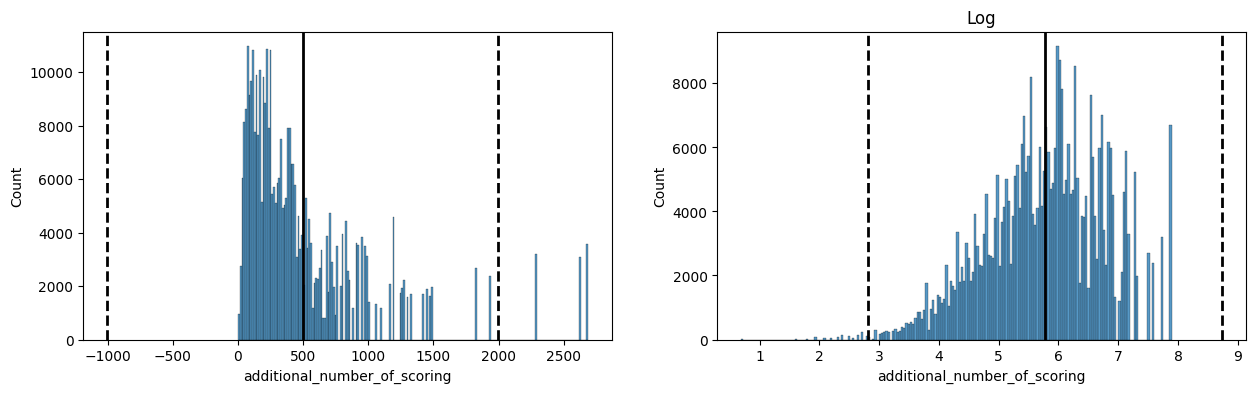

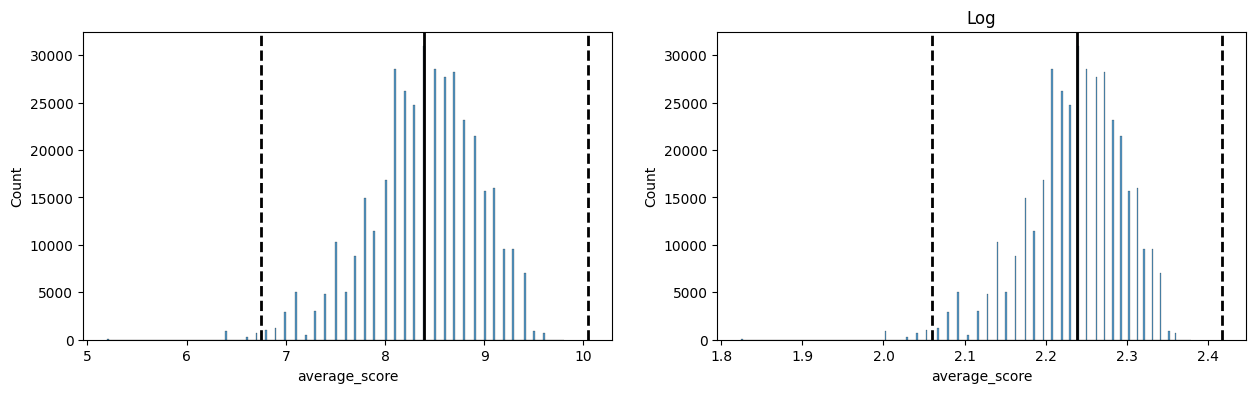

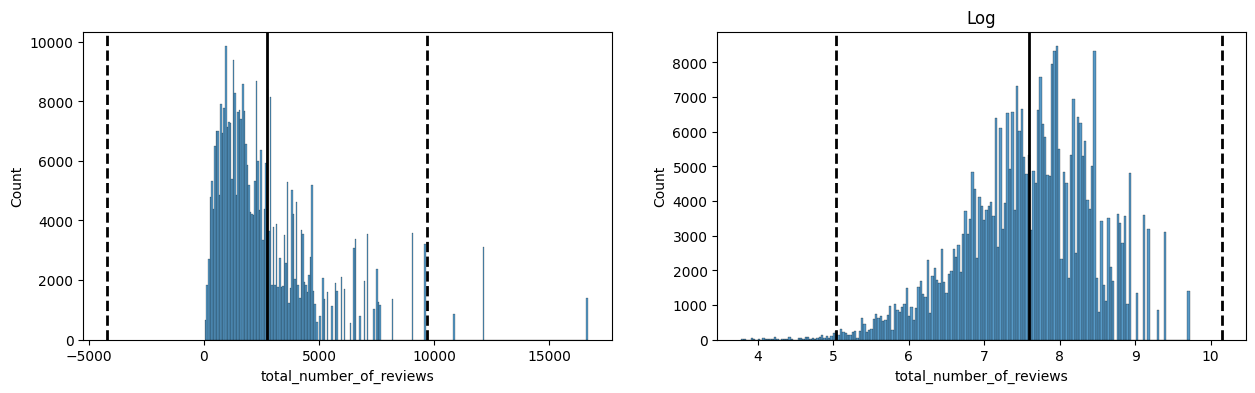

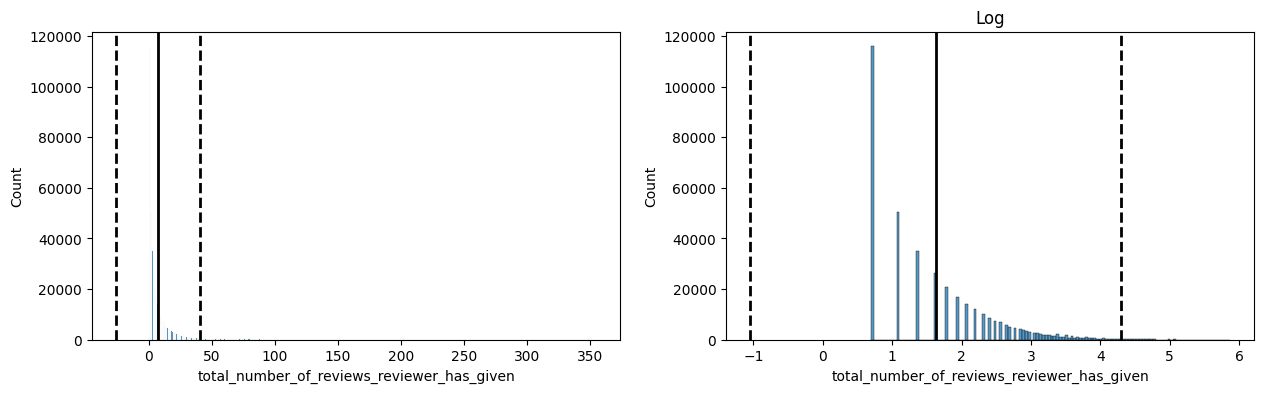

In [28]:
#посмотрим на распределение признаков
#признаков много, но я рассматриваю только основные 
#нам потребуются только числовые признаки, которые были изначально и которые могут влиять на результирующий показатель и по которым могут быть большие значения (из describe выше)
#выбрал 4 признака
outliers_features = [
    'additional_number_of_scoring',
    'average_score',
    'total_number_of_reviews', 
    'total_number_of_reviews_reviewer_has_given'
]

#делаем графики
for i in outliers_features:
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    #гистограмма исходного признака
    histplot = sns.histplot(data=hotels_prepared[i], ax=axes[0]);
    histplot.axvline(hotels_prepared[i].mean(), color='k', lw=2)
    histplot.axvline(hotels_prepared[i].mean()+ 3 * hotels_prepared[i].std(), color='k', ls='--', lw=2)
    histplot.axvline(hotels_prepared[i].mean()- 3 * hotels_prepared[i].std(), color='k', ls='--', lw=2)

    #гистограмма в логарифмическом масштабе
    log_features= np.log(hotels_prepared[i]+1)
    histplot2 = sns.histplot(log_features, ax=axes[1])
    histplot2.axvline(log_features.mean(), color='k', lw=2)
    histplot2.axvline(log_features.mean()+ 3 * log_features.std(), color='k', ls='--', lw=2)
    histplot2.axvline(log_features.mean()- 3 * log_features.std(), color='k', ls='--', lw=2)
    histplot2.set_title('Log');

In [29]:
#создадим df c количеством выбросов
outliers_dict= {'outliers':[], 'lower_bound':[], 'upper_bound':[]}

#сделаем копию таблицу для прогона по данным
hotels_prepared_for_outliers = hotels_prepared

for i in outliers_features:
    outliers, cleaned = outliers_z_score(hotels_prepared_for_outliers, i, log_scale=False)
    outliers_dict['outliers'].append(outliers.shape[0])
    outliers_dict['lower_bound'].append(hotels_prepared_for_outliers[i].mean() - 3 * hotels_prepared_for_outliers[i].std())
    outliers_dict['upper_bound'].append(hotels_prepared_for_outliers[i].mean() + 3 * hotels_prepared_for_outliers[i].std())
    
outliers_df = pd.DataFrame(outliers_dict)
#доля выбросов от общего числа
outliers_df['share'] = outliers_df['outliers'] / hotels_prepared.shape[0]
outliers_df.index = outliers_features

display(outliers_df)
#суммарные объемы выбросов небольшие - до 5%

,outliers,lower_bound,upper_bound,share
additional_number_of_scoring,9888,-1002.527500,1999.020573,0.025563
average_score,1930,6.753588,10.040873,0.004990
total_number_of_reviews,5351,-4205.379012,9693.363097,0.013834
total_number_of_reviews_reviewer_has_given,7615,-25.986009,40.340510,0.019687


In [30]:
hotels_prepared_cleaned = hotels_prepared
for i in list(outliers_df.index):
    hotels_prepared_cleaned = hotels_prepared_cleaned[(hotels_prepared_cleaned[i]>outliers_df['lower_bound'].loc[i])]
    hotels_prepared_cleaned = hotels_prepared_cleaned[(hotels_prepared_cleaned[i]<outliers_df['upper_bound'].loc[i])]

In [31]:
#hotels_prepared_cleaned = cleaned
#hotels_prepared_cleaned.reset_index(drop=True, inplace=True)
hotels_prepared_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365340 entries, 0 to 386802
Data columns (total 63 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   hotel_address                                    365340 non-null  object        
 1   additional_number_of_scoring                     365340 non-null  int64         
 2   review_date                                      365340 non-null  datetime64[ns]
 3   average_score                                    365340 non-null  float64       
 4   hotel_name                                       365340 non-null  object        
 5   reviewer_nationality                             365340 non-null  object        
 6   negative_review                                  365340 non-null  object        
 7   review_total_negative_word_counts                365340 non-null  int64         
 8   total_number_of_reviews 

In [32]:
hotels_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 63 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   hotel_address                                    386803 non-null  object        
 1   additional_number_of_scoring                     386803 non-null  int64         
 2   review_date                                      386803 non-null  datetime64[ns]
 3   average_score                                    386803 non-null  float64       
 4   hotel_name                                       386803 non-null  object        
 5   reviewer_nationality                             386803 non-null  object        
 6   negative_review                                  386803 non-null  object        
 7   review_total_negative_word_counts                386803 non-null  int64         
 8   total_number_of_reviews 

## Вывод:
Мы убрали выбросы методы z-отклонений по логарифмической шкале в количестве 21463 шт. (5.5% от всех записей)

:arrow_up:[к оглавлению](#Оглавление)

# 6. Проверка на нормальность, нормализация и стандартизация <a name="six"></a>

In [33]:
#проверим признаки на нормальность
from scipy.stats import shapiro

In [34]:
list_of_columns = [
   'additional_number_of_scoring',
    'average_score',
    'total_number_of_reviews', 
    'total_number_of_reviews_reviewer_has_given'
]


for i in list_of_columns:

	_, p = shapiro(hotels_prepared_cleaned[i])
	print('p=%.3f' % p)

	# Интерпретация 

	if p > 0.05:
		print(f'{i}: Данные распределены нормально')
	else:
		print(f'{i}: Данные распределены ненормально')
  
# данные распределены ненормально

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p=0.000
additional_number_of_scoring: Данные распределены ненормально
p=0.000
average_score: Данные распределены ненормально
p=0.000
total_number_of_reviews: Данные распределены ненормально
p=0.000
total_number_of_reviews_reviewer_has_given: Данные распределены ненормально


In [35]:
#пробуем нормализовать, а затем стандартизировать
from sklearn import preprocessing

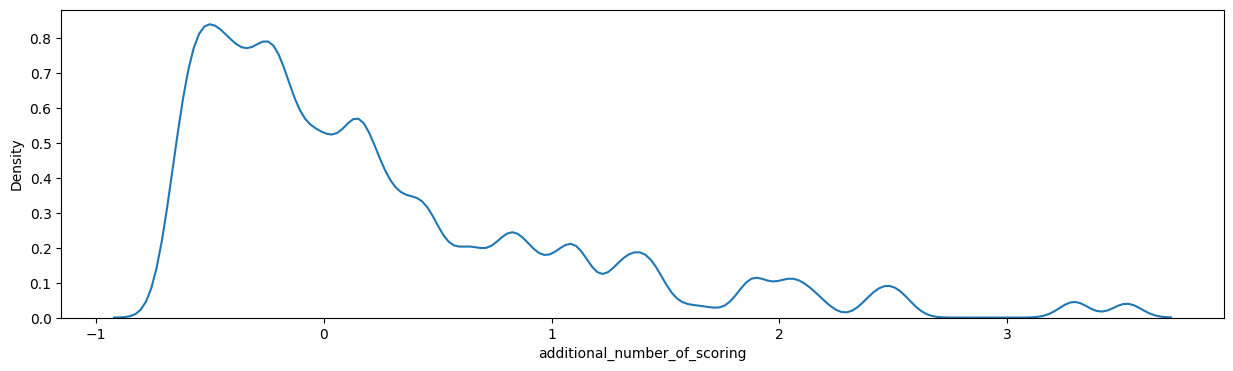

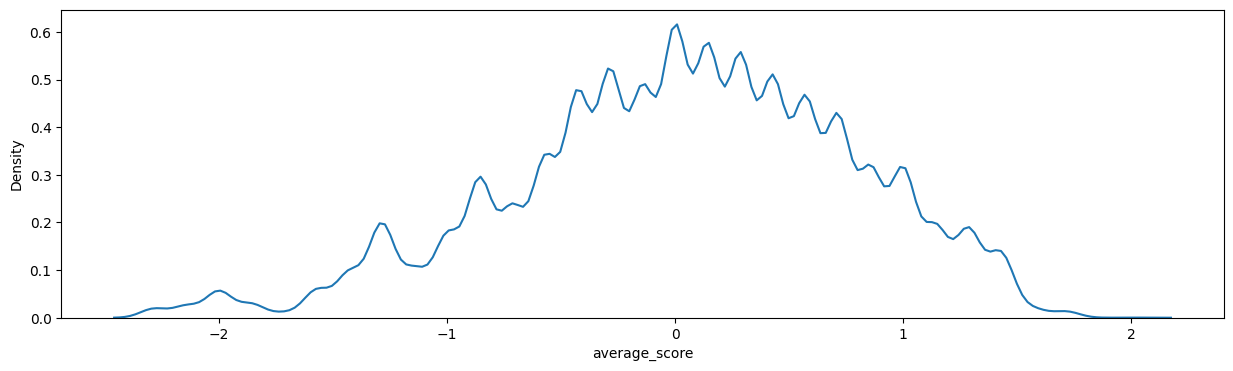

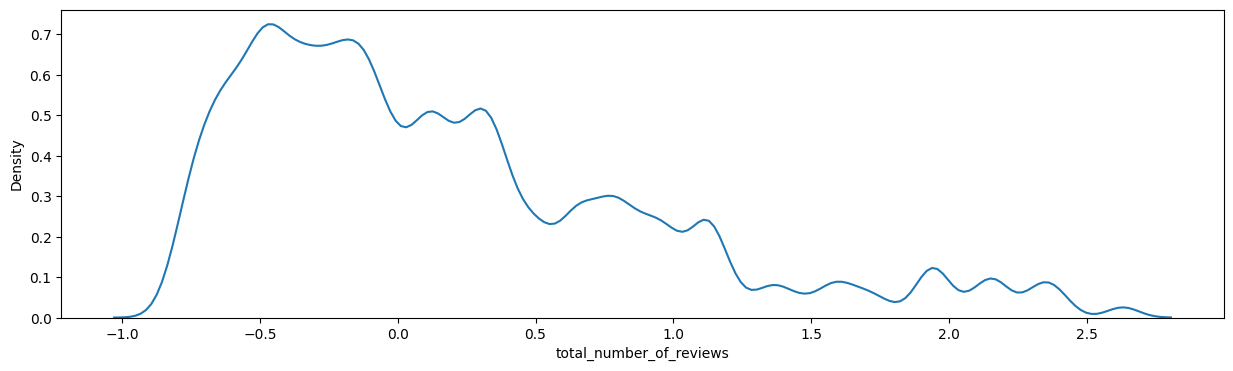

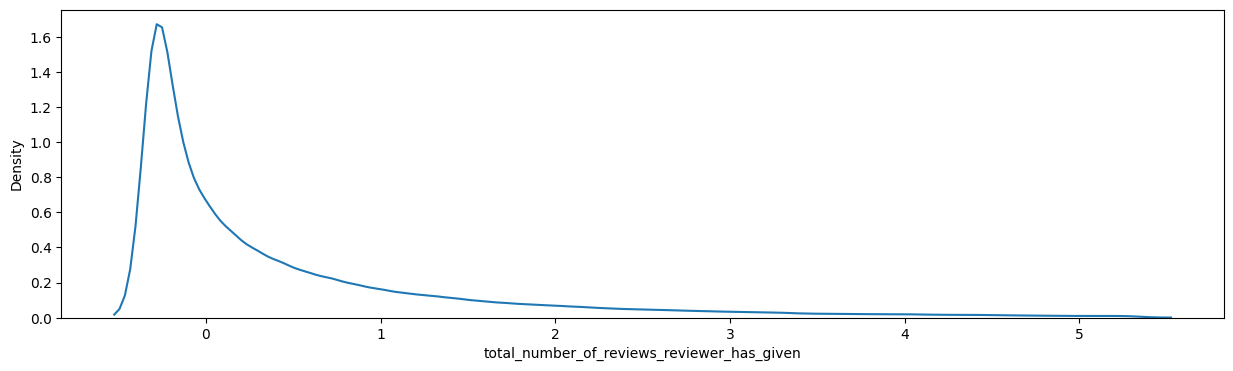

In [36]:
# инициализируем нормализатор RobustScaler (т.к. даже после выбросов данные не идеальны)
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(hotels_prepared_cleaned[list_of_columns])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=list_of_columns)

#смотрим на распределения
for i in list_of_columns:
    fig = plt.figure(figsize=(15, 4))
    kdeplot = sns.kdeplot(data = df_r[i], legend=True)


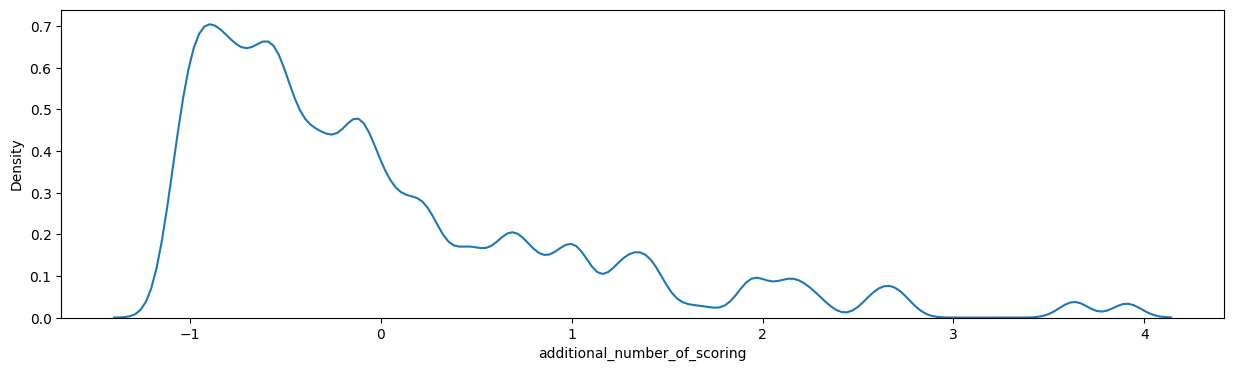

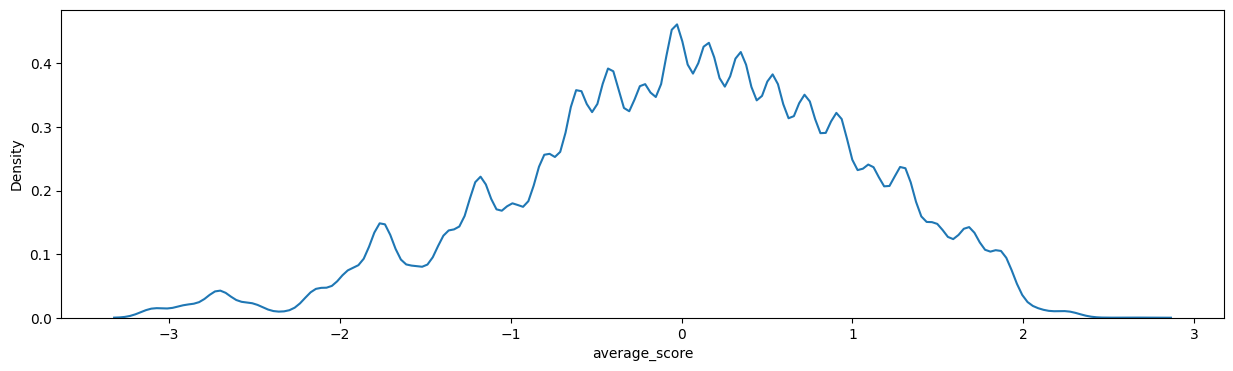

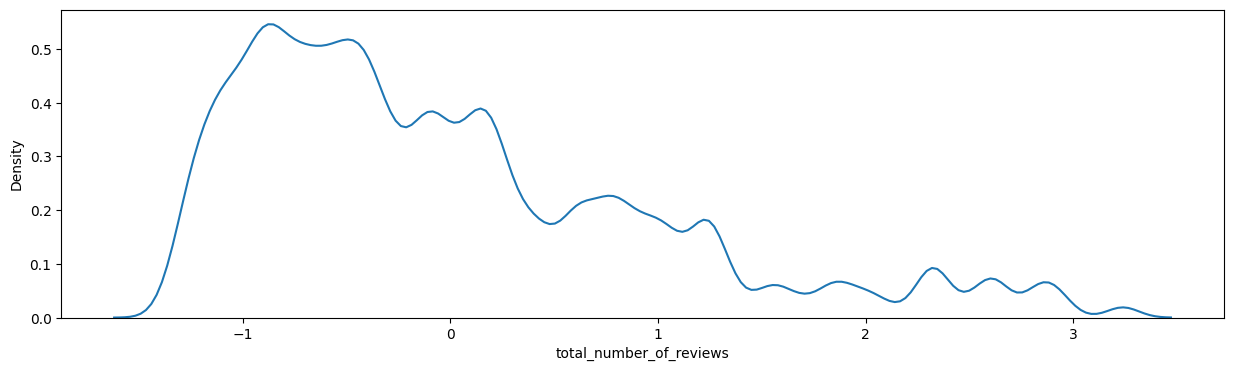

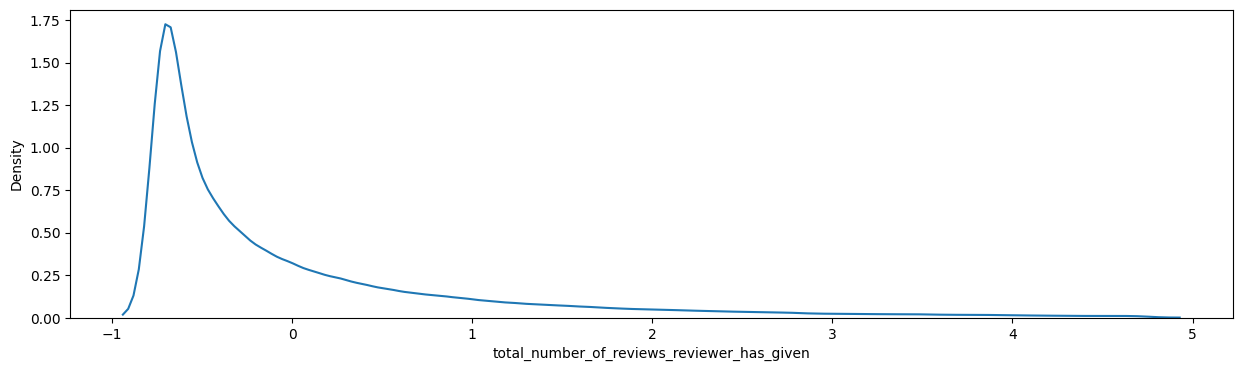

In [37]:
# стандартизируем данные
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df_r)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=list_of_columns)


for i in list_of_columns:
    fig = plt.figure(figsize=(15, 4))
    kdeplot = sns.kdeplot(data = df_s[i], legend=True)

In [38]:
#заменяем значения соответствующих столбцов в hotel_prepared_cleared на нормализоваванные и стандартизированные данные
hotels_prepared_cleaned.reset_index(drop=True, inplace=True)
for i in list_of_columns:
    hotels_prepared_cleaned[i] = df_s[i]

## Вывод:
По 4-м основным признакам сделали нормализацию и стандартизацию

:arrow_up:[к оглавлению](#Оглавление)

# 7. Удаление ненужных текстовых данных <a name="seven"></a>

In [39]:
# удаление ненужных текстовых данных 
# подготавливаем исходную таблцу - удаляем ненужные столбцы с текстовыми данными
hotels_cleared = hotels_prepared_cleaned.copy()

#создаем список столбцов, которые нужно убрать

object_columns = [s for s in hotels_prepared.columns if hotels_prepared[s].dtypes == 'object']

#очищаем таблицу
hotels_cleared = hotels_cleared.drop(object_columns, axis = 1)

#убираем результирующий показатель reviewer_score
#hotels_cleared = hotels_cleared.drop(['reviewer_score'], axis = 1) 

#убираем столбец с датой
hotels_cleared = hotels_cleared.drop(['review_date'], axis = 1) 
hotels_cleared.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,proportion_positive_words_count,sum_words_count,neg_in_positive_review,neu_in_positive_review,pos_in_positive_review,compound_in_positive_review,neg_in_negative_review,neu_in_negative_review,pos_in_negative_review,compound_in_negative_review
0,0.355879,-0.037755,3,-0.277952,4,0.123131,10.0,531,51.507894,-0.143671,...,0.571429,7,0.000,0.345,0.655,0.5859,0.000,1.000,0.0,0.0000
1,-0.383229,-0.228516,3,-0.637921,2,1.093366,6.3,203,51.521009,-0.123097,...,0.400000,5,0.000,1.000,0.000,0.0000,0.756,0.244,0.0,-0.4767
2,-1.083023,0.916051,6,-1.181002,0,1.093366,7.5,289,48.845377,2.325643,...,0.000000,6,0.379,0.000,0.621,0.3400,0.423,0.577,0.0,-0.2960
3,-1.077781,-1.754605,0,-1.066699,11,0.261736,10.0,681,48.888697,2.394540,...,1.000000,11,0.000,0.279,0.721,0.9169,1.000,0.000,0.0,-0.7096
4,1.228656,0.153006,4,2.902059,20,0.538946,9.6,516,52.385601,4.847060,...,0.833333,24,0.000,0.618,0.382,0.8503,0.667,0.333,0.0,-0.2500


In [40]:
#hotels_cleared.info()
hotels_cleared.columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'month_of_review', 'year_of_review',
       'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nationality_6', 'reviewer_nationality_7',
       'hotel_address_prep_['United', 'Kingdom']',
       'hotel_address_prep_['Paris', 'France']',
       'hotel_address_prep_['Amsterdam', 'Netherlands']',
       'hotel_address_prep_['Milan', 'Italy']',
       'hotel_address_prep_['Vienna', 'Austria']',
       'hotel_address_prep_['Barcelona', 'Spain']', 'nights', 'count_tags',
       'Standard', 'Comfort', 'Classic', 'Superior', 'Deluxe', 'Executive',
       'Premier', 'Solo', 'Couple'

:arrow_up:[к оглавлению](#Оглавление)

# 8. Отбор признаков <a name="eight"></a>

<AxesSubplot: >

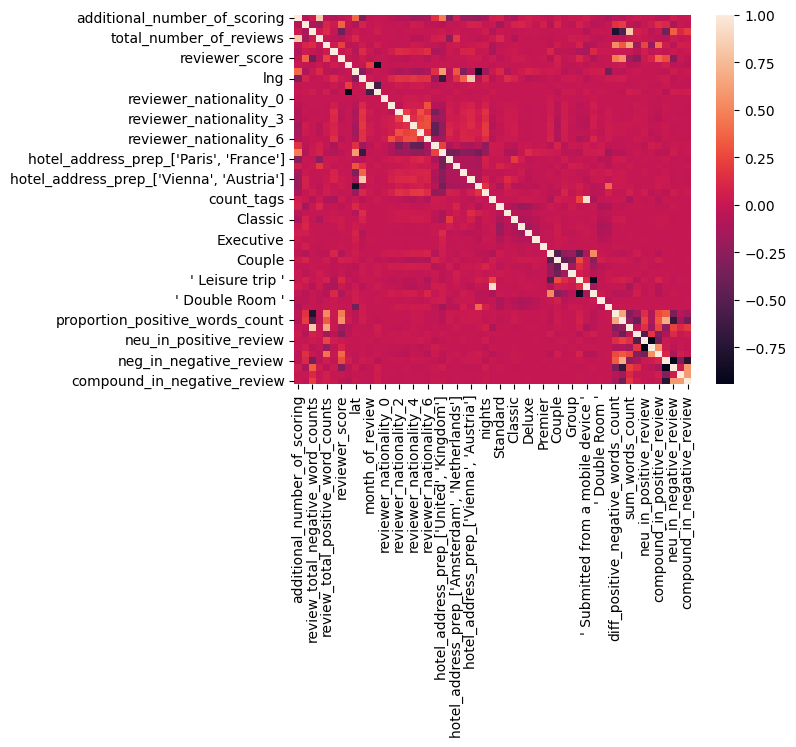

In [41]:
# сформируем первоначлаьную матрицу корреляции
sns.heatmap(hotels_cleared.corr())

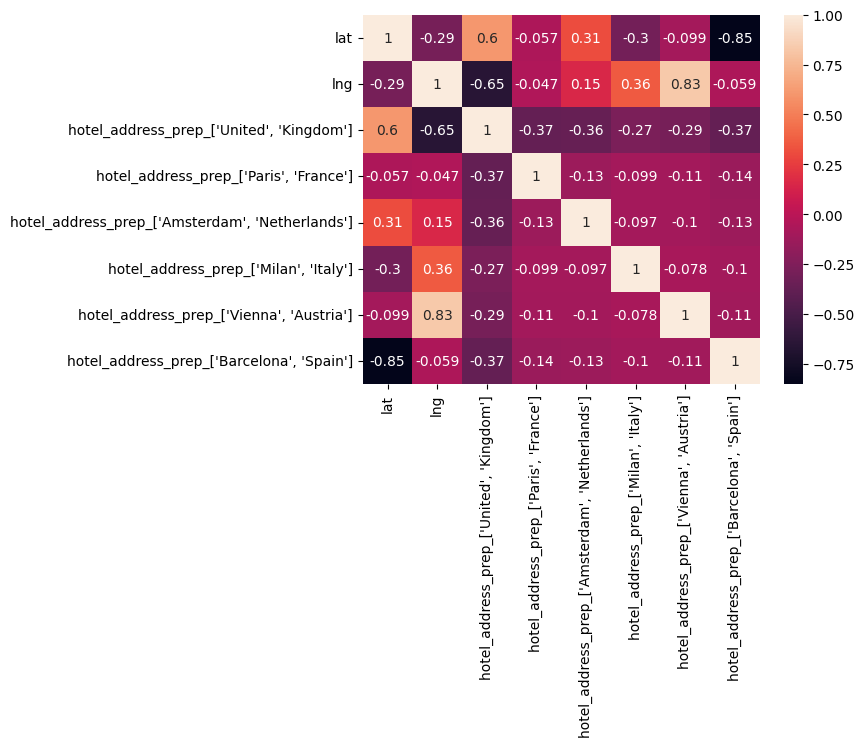

In [42]:
# в первую очередь проверим корреляцию страны отеля и широты с долготой
sns.heatmap(hotels_cleared[['lat','lng',"hotel_address_prep_['United', 'Kingdom']",
       "hotel_address_prep_['Paris', 'France']",
       "hotel_address_prep_['Amsterdam', 'Netherlands']",
       "hotel_address_prep_['Milan', 'Italy']",
       "hotel_address_prep_['Vienna', 'Austria']",
       "hotel_address_prep_['Barcelona', 'Spain']"]].corr(), annot = True)
# сильная мультиколинеарность есть, с тем координатами, в которых находятся сами отели, поэтому лучше отказаться от признаков соответствия по странам
# оставляем lat, lng - их меньше и они точнее
# удаляем столбцы hotel_adress_prep
hotels_cleared = hotels_cleared.drop(["hotel_address_prep_['United', 'Kingdom']",
       "hotel_address_prep_['Paris', 'France']",
       "hotel_address_prep_['Amsterdam', 'Netherlands']",
       "hotel_address_prep_['Milan', 'Italy']",
       "hotel_address_prep_['Vienna', 'Austria']",
       "hotel_address_prep_['Barcelona', 'Spain']"],axis=1)

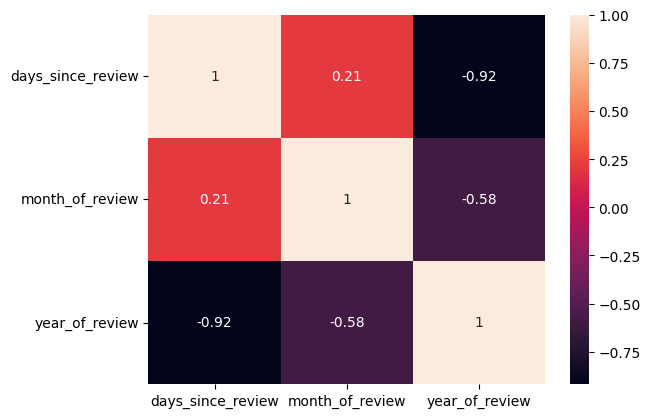

In [43]:
# заметил, что есть высокая корреляция между days_since_review, month_of_review, year_of_review
sns.heatmap(hotels_cleared[['days_since_review', 'month_of_review', 'year_of_review']].corr(), annot = True)
# удаляем столбец с годом
hotels_cleared = hotels_cleared.drop(['year_of_review'],axis=1)

In [44]:
#смотрим какие столбцы ещё остались
#hotels_cleared.columns

<AxesSubplot: >

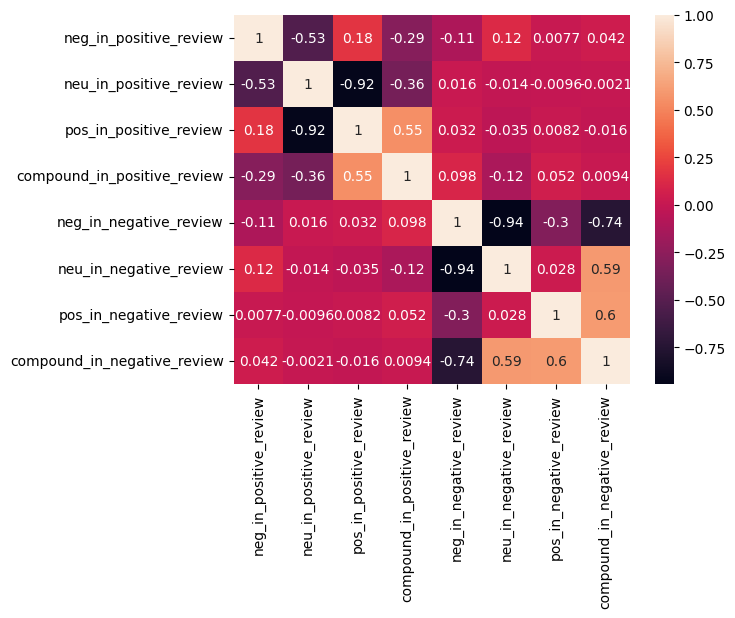

In [45]:
sns.heatmap(hotels_cleared[['neg_in_positive_review', 'neu_in_positive_review',
       'pos_in_positive_review', 'compound_in_positive_review',
       'neg_in_negative_review', 'neu_in_negative_review',
       'pos_in_negative_review', 'compound_in_negative_review']].corr(), annot = True)

#сильная корреляция между 'pos_in_positive_review' и 'neu_in_positive_review'. Убираю 'neu_in_positive_review'
#сильная корреляция между 'neg_in_negative_review' и 'neu_in_negative_review'. Убираю 'neu_in_neagtive_review'
# отказался от удаления столбцов, т.к. приводит ухудшению метрики
#hotels_cleared = hotels_cleared.drop(['neu_in_positive_review','neu_in_negative_review'], axis=1)

<AxesSubplot: >

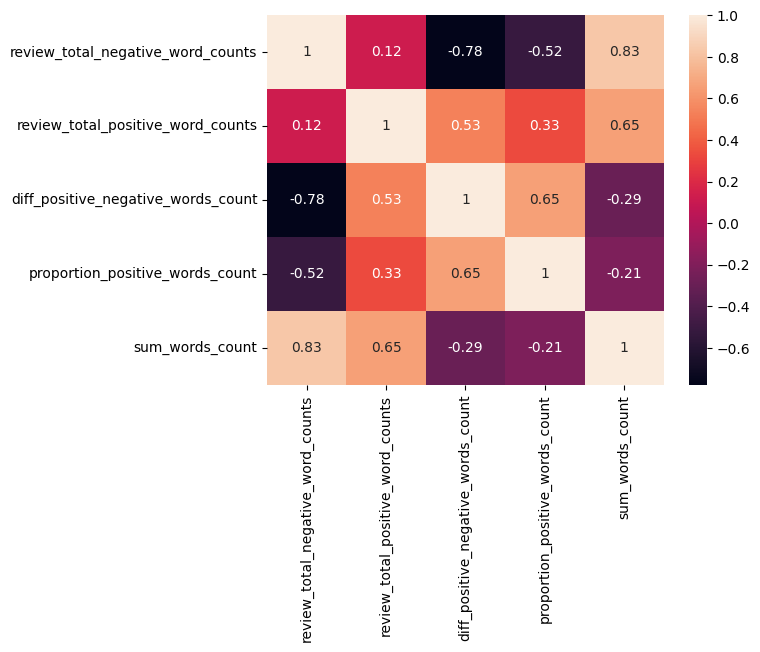

In [46]:
sns.heatmap(hotels_cleared[['review_total_negative_word_counts',
       'review_total_positive_word_counts','diff_positive_negative_words_count', 'proportion_positive_words_count',
       'sum_words_count']].corr(), annot = True)

#сильная корреляция между 'diff_positive_negative_words_count' и 'review_total_negative_word_counts'. 
#отказался от идеи удалять признаки, т.к. приводит к ухудшению метрики
#hotels_cleared = hotels_cleared.drop(['diff_positive_negative_words_count], axis=1)

48

<AxesSubplot: >

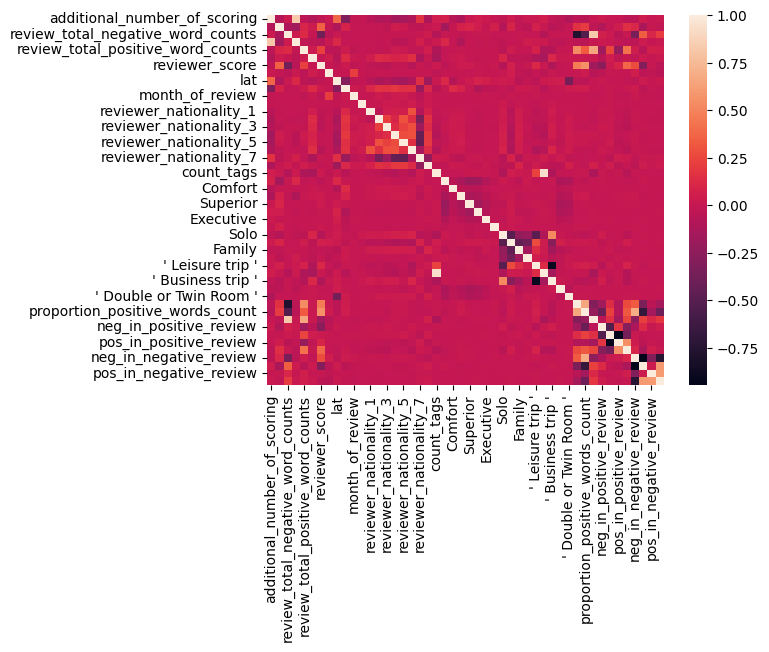

In [47]:
display(len(hotels_cleared.columns))
sns.heatmap(hotels_cleared.corr())
# у нас больше 40 признаков, соответственно получается матрица на 1600 ячеек ячеек, что затрудняет оценку
# попробуем убрать лишние значения

In [48]:
#пробуем сделать таблицу поменьше
corr_table = hotels_cleared.corr()

# заменяем значение при корреляции столбца самого на себя с 1 на 0
for i in corr_table.columns:
    corr_table[i] = corr_table[i].apply(lambda x: 0 if x==1 else x)

#отбираем столбцы с экстремальными значениями
list_of_columns = []
for i in corr_table.columns:
    if corr_table[i].min()<=-0.7 or corr_table[i].max()>=0.7:
        list_of_columns.append(i)
    
corr_table_prep = corr_table[list_of_columns]

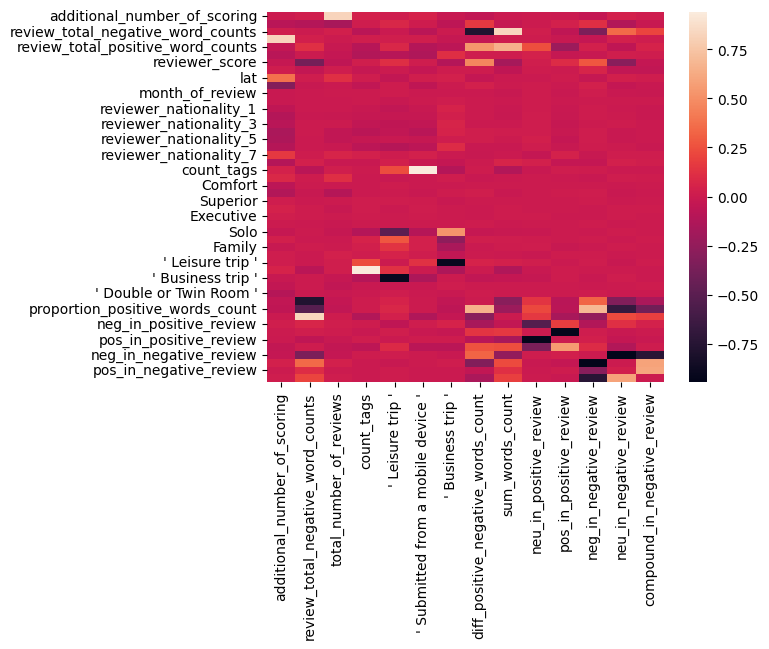

In [49]:
sns.heatmap(corr_table_prep)
# сильная корреляция у двух признаков - additional number of scoring  и total number of reviews
# пробовал удалить total number of reviews, но приводит к ухудшению метрики, отказался от этой идеи

# сильная корреляция у двух признаков - count of tags  и submitted from mobile device
# пробуем удалить submitted from mobile device

# сильная корреляция у двух признаков - leisure trip  и business trip
# пока оставлю оба, т.к. это два противоположных значения

#сильная корреляция между 'review_total_negative_word_counts','sum_words_count'
# убираю 'sum_words_count'

hotels_cleared = hotels_cleared.drop(["' Submitted from a mobile device '", 'sum_words_count'],axis=1)

#признаки категории номера плохо показали себя при оценке вклада в метрику, поэтому их тоже удаляю
hotels_cleared = hotels_cleared.drop(['Standard', 'Comfort', 'Classic', 'Superior', 'Deluxe',
       'Executive', 'Premier'], axis=1)

#удаляю также признаки, которые относятся к типу номеров и которые есть в тегах
hotels_cleared = hotels_cleared.drop(["' Double Room '", "' Double or Twin Room '"], axis=1)

<AxesSubplot: >

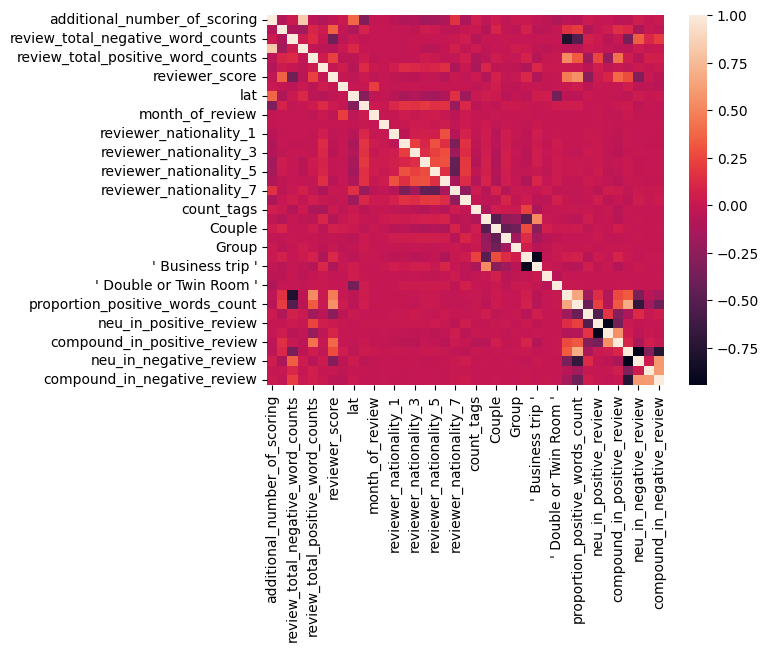

In [50]:
sns.heatmap(hotels_cleared.corr())

In [51]:
display(len(hotels_cleared.columns))
hotels_cleared.columns

39

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'month_of_review',
       'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nationality_6', 'reviewer_nationality_7', 'nights',
       'count_tags', 'Solo', 'Couple', 'Family', 'Group', '' Leisure trip '',
       '' Business trip '', '' Double Room '', '' Double or Twin Room '',
       'diff_positive_negative_words_count', 'proportion_positive_words_count',
       'neg_in_positive_review', 'neu_in_positive_review',
       'pos_in_positive_review', 'compound_in_positive_review',
       'neg_in_negative_review', 'neu_in_negative_review',
       'pos_in_negative_review', 'com

## Вывод:
В результате отбора признаков по наличию мультиколинеарности их количество сократилось до 45.

:arrow_up:[к оглавлению](#Оглавление)

# 9. Оценка влияния признаков <a name="nine"></a>

In [81]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)

X = hotels_cleared[['additional_number_of_scoring', 
                    'average_score',
                    'review_total_negative_word_counts', 
                    'total_number_of_reviews',
                    'review_total_positive_word_counts',
                    'total_number_of_reviews_reviewer_has_given',
                    'days_since_review', 
                    'lat', 
                    'lng', 
                    'month_of_review', 
                    'reviewer_nationality_0', 
                    'reviewer_nationality_1',
                    'reviewer_nationality_2', 
                    'reviewer_nationality_3',
                    'reviewer_nationality_4', 
                    'reviewer_nationality_5',
                    'reviewer_nationality_6',
                    'reviewer_nationality_7',
                    'nights', 
                    'count_tags',
                    'Solo', 
                    'Couple', 
                    'Family', 
                    'Group',
                    "' Leisure trip '",
                    "' Business trip '",
                    'diff_positive_negative_words_count',
                    'proportion_positive_words_count',
                    'neg_in_positive_review', 
                    'neu_in_positive_review',
                    'pos_in_positive_review', 
                    'compound_in_positive_review',
                    'neg_in_negative_review',
                    'neu_in_negative_review',
                    'pos_in_negative_review',
                    'compound_in_negative_review']]
#X = hotels_cleared.drop(['reviewer_score'],axis=1)  
y = hotels_cleared['reviewer_score'] 

Перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

Для начала разделим признаки по типу, перечислим их:

In [257]:
hotels_cleared.columns
#hotels_cleared.head()

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'month_of_review', 'reviewer_nationality_0',
       'reviewer_nationality_1', 'reviewer_nationality_2',
       'reviewer_nationality_3', 'reviewer_nationality_4',
       'reviewer_nationality_5', 'reviewer_nationality_6',
       'reviewer_nationality_7', 'hotel_address_prep_['United', 'Kingdom']',
       'hotel_address_prep_['Paris', 'France']',
       'hotel_address_prep_['Amsterdam', 'Netherlands']',
       'hotel_address_prep_['Milan', 'Italy']',
       'hotel_address_prep_['Vienna', 'Austria']',
       'hotel_address_prep_['Barcelona', 'Spain']', 'nights', 'count_tags',
       'Standard', 'Comfort', 'Classic', 'Superior', 'Deluxe', 'Executive',
       'Premier', 'Solo', 'Couple', 'Family', 'Group', '' Leisure trip '',
       '' Business trip '

In [258]:
len(hotels_cleared.columns)

48

In [261]:
# непрерывные признаки
num_cols = ['additional_number_of_scoring',
            'average_score',
            'review_total_negative_word_counts',
            'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given',
            'days_since_review',
            'nights',
            'proportion_positive_words_count', 
            'neg_in_positive_review',
            'pos_in_positive_review', 
            'compound_in_positive_review',
            'neg_in_negative_review', 
            'pos_in_negative_review',
            'compound_in_negative_review',
            'diff_positive_negative_words_count','sum_words_count'
]

# категориальные признаки
cat_cols = ['month_of_review',
            'reviewer_nationality_0', 
            'reviewer_nationality_1',
            'reviewer_nationality_2', 
            'reviewer_nationality_3',
            'reviewer_nationality_4', 
            'reviewer_nationality_5',
            'reviewer_nationality_6', 
            'reviewer_nationality_7',
            'Standard', 
            'Comfort', 
            'Classic', 
            'Superior', 
            'Deluxe', 
            'Executive',
            'Premier', 
            'Solo', 
            'Couple',
            'Family', 
            'Group', 
            "hotel_address_prep_['United', 'Kingdom']",
            "hotel_address_prep_['Paris', 'France']",
            "hotel_address_prep_['Amsterdam', 'Netherlands']",
            "hotel_address_prep_['Milan', 'Italy']",
            "hotel_address_prep_['Vienna', 'Austria']",
            "hotel_address_prep_['Barcelona', 'Spain']",
            'count_tags',
            "' Leisure trip '",
            "' Business trip '", 
            "' Double Room '", 
            "' Double or Twin Room '"
]

In [263]:
len(num_cols)+len(cat_cols)

47

<AxesSubplot: >

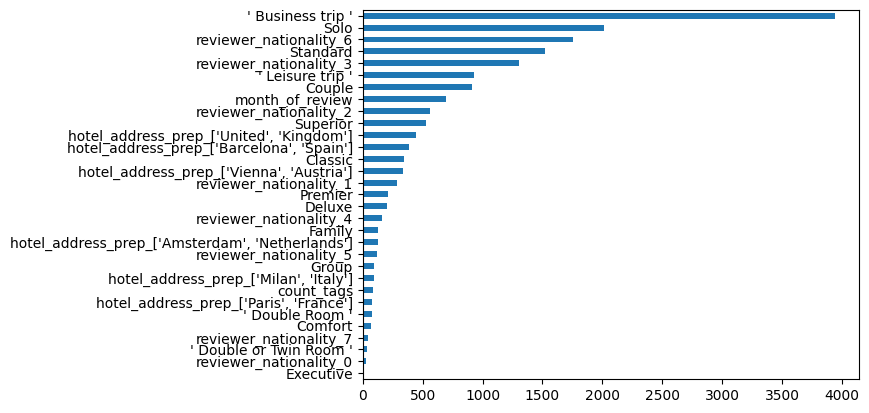

In [264]:
# Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. 
# Метод возвращает массив значений хи-квадрат и p-value для каждого признака. 
# Используем только значения хи-квадрат и выведем их на графике:

y=y.astype('int')


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot: >

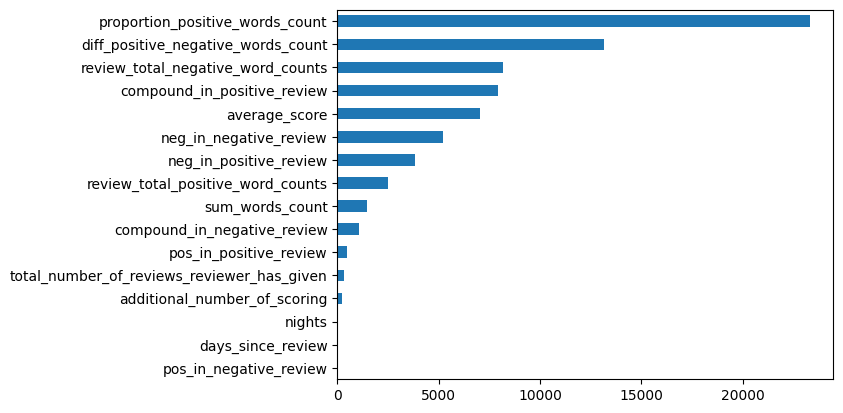

In [265]:
# Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. 
# В основе метода оценки значимости переменных лежит анализ (ANOVA). 
# Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

# Метод возвращает двумерный массив f-статистик и p-value для каждого признака. 
# В качестве меры значимости будем использовать значение f-статистики. 
# Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

# 10. Моделирование <a name="ten"></a>

In [53]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [82]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 20% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1 ,random_state=42)  
#verbose=1, n_jobs=-1
  
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.8s finished


<AxesSubplot: >

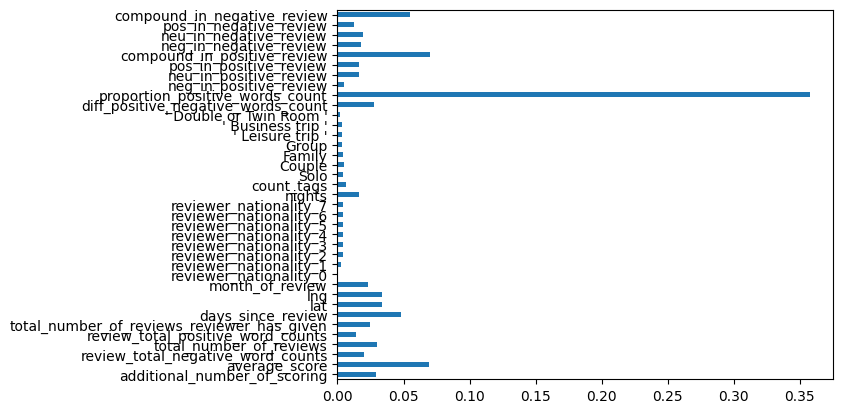

In [84]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

## По результатам оценки важности в предыдущих итерациях оказалось, что:
1. Признаки наличия определенного тега (в частности в категории номера) оказались не важными при оценке результирующего показателя. Поэтому отказался от них
2. Признак национальности также оказался маловажным при оценке результирующего показателя (но, тем не менее оставил его)
3. Основной вклад в оценку дает количество позитивных и негативных слов. Поэтому оставил много признаков по их соотношению и признаков по эмоциальной оценке. 

In [85]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12535824844695218


# Вывод по результатам проекта:
1. Оценены и исходные данные, даны ответы на вопросы
2. Данные обработаны, в т.ч. убраны пропуски, выбросы, переведены в другие форматы (при необходимости)
3. Созданы новые признаки
4. Признаки отобраны для дальнейшего использования в модели
5. Модель сформирована, по сравнению с первоначальным вариантом метрика качества улучшена

:arrow_up:[к оглавлению](#Оглавление)